In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.iforest import IForest

In [2]:
# Load in the data
df = pd.read_csv('data/transactions.csv')

# View the data
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [6]:
# Isolate the numeric values for anomaly detection
features = df[["TransactionAmount", "TransactionDuration", "AccountBalance"]]

# View the results
features.head()

,TransactionAmount,TransactionDuration,AccountBalance
0,14.09,81,5112.21
1,376.24,141,13758.91
2,126.29,56,1122.35
3,184.50,25,8569.06
4,13.45,198,7429.40


In [7]:
# Use isolation forest for anomaly detection
model = IForest(n_estimators = 100, contamination = 0.05, random_state = 42)
model.fit(features)

IForest(behaviour='old', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=1,
    random_state=42, verbose=0)

In [8]:
# Add a column for anomaly detection to dataset
df['Anomaly_Score'] = model.decision_function(features)

/home/workbench/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


In [11]:
# Flag transactions based on predictions
df['Anomaly'] = (model.predict(features) ==1).astype(int)

# Create a summary of anomalous transactions
anomalies_summary = df.loc[df["Anomaly"] ==1, ["TransactionID", "TransactionAmount", "TransactionDuration", "AccountBalance"]]

/home/workbench/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


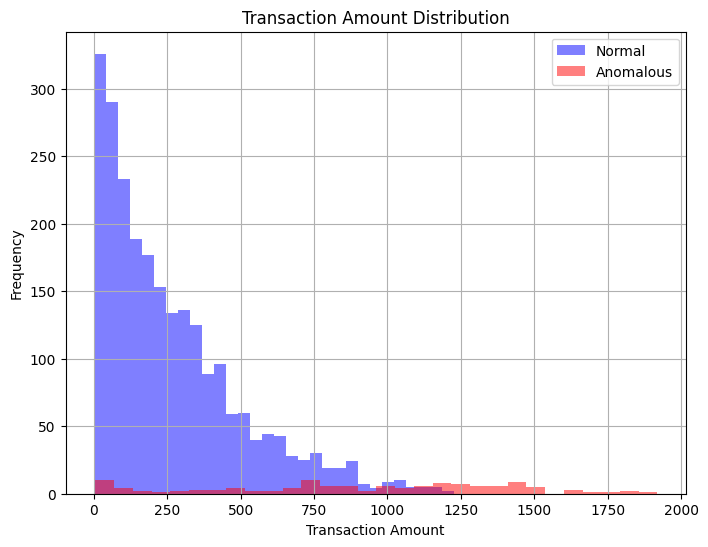

In [13]:
# Plot the distribution of TransactionAmount for normal and anomalous transactions
plt.figure(figsize=(8, 6))
df[df["Anomaly"] == False]["TransactionAmount"].hist(bins=30, alpha=0.5, label="Normal", color="blue")
df[df["Anomaly"] == True]["TransactionAmount"].hist(bins=30, alpha=0.5, label="Anomalous", color="red")
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("anomalies_histogram.png")